In [82]:
%pylab inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import requests
import zipfile
import io
import math
#StringIO is gone from Python3, instead import io 
#use import StringIO if need to run onpython2

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [63]:
#create dict that holds the URL and file info for the last 12 months of data
files = {}
files['oct14'] = ['https://s3.amazonaws.com/tripdata/201410-citibike-tripdata.zip',
                   '201410-citibike-tripdata.csv']
files['nov14'] = ['https://s3.amazonaws.com/tripdata/201411-citibike-tripdata.zip',
                   '201411-citibike-tripdata.csv']
files['dec14'] = ['https://s3.amazonaws.com/tripdata/201412-citibike-tripdata.zip',
                   '201412-citibike-tripdata.csv']
files['jan15'] = ['https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip',
                   '201501-citibike-tripdata.csv']
files['feb15'] = ['https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip',
                   '201502-citibike-tripdata.csv']
files['mar15'] = ['https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip',
                   '201503-citibike-tripdata.csv']
files['apr15'] = ['https://s3.amazonaws.com/tripdata/201504-citibike-tripdata.zip',
                   '201504-citibike-tripdata.csv']
files['may15'] = ['https://s3.amazonaws.com/tripdata/201505-citibike-tripdata.zip',
                   '201505-citibike-tripdata.csv']
files['jun15'] = ['https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip',
                   '201506-citibike-tripdata.csv']
files['jul15'] = ['https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip',
                   '201507-citibike-tripdata.csv']
files['aug15'] = ['https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip',
                   '201508-citibike-tripdata.csv']
files['sep15'] = ['https://s3.amazonaws.com/tripdata/201509-citibike-tripdata.zip',
                   '201509-citibike-tripdata.csv']

In [67]:
#create empty dict to store my 12 months of pandas dataframes
seasons = {}

for n in files.keys():
    #use file key name as name in new seasons dictionary, which will hold all the pandas DFs
    name = "{0}".format(n)
    r = requests.get(files[n][0])
    #if using python 2, use the following instead of the 'z' line:
    #z = zipfile.ZipFile(StringIO.StringIO(r.content))
    z = zipfile.ZipFile(io.BytesIO(r.content))
    #save months into a seperate dictionary with relevant cols
    seasons[name]= pd.read_csv(z.open(files[n][1]),
                  usecols=['start station id', 'starttime', 'usertype', 'birth year', 'gender'])

In [72]:
#get list of which dataframes are in each data sample: all, winter, summer
all_months = [seasons['sep15'], seasons['oct14'], seasons['nov14'], seasons['dec14']
              , seasons['jan15'], seasons['feb15'], seasons['mar15'], seasons['apr15']
              , seasons['may15'], seasons['jun15'], seasons['jul15'], seasons['aug15']]
fall_winter = [seasons['sep15'], seasons['oct14'], seasons['nov14'], seasons['dec14']
               , seasons['jan15'], seasons['feb15']]
spring_summer = [seasons['mar15'], seasons['apr15'], seasons['may15'], seasons['jun15']
                 , seasons['jul15'], seasons['aug15']]

#merge all of the months into a single dataframe
df_A = pd.concat(all_months, ignore_index=True)
df_W = pd.concat(fall_winter, ignore_index=True)
df_S = pd.concat(spring_summer, ignore_index=True)

In [73]:
#delete all rows that are not subscribers
df_A = df_A[df_A.usertype == 'Subscriber']
df_W = df_W[df_W.usertype == 'Subscriber']
df_S = df_S[df_S.usertype == 'Subscriber']

#calculate age
df_A['age'] = 2015-df_A['birth year']
df_W['age'] = 2015-df_A['birth year']
df_S['age'] = 2015-df_A['birth year']

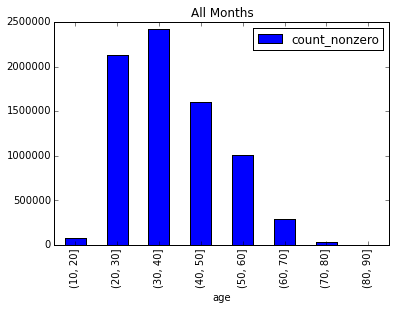

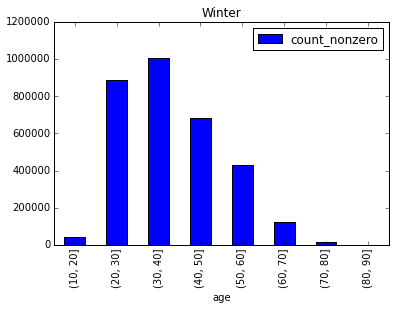

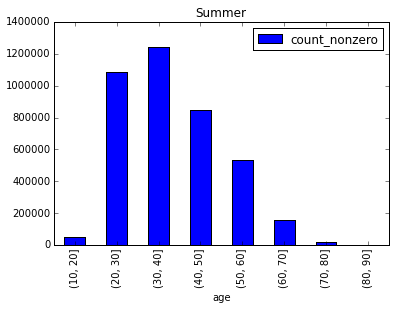

In [76]:
bins = np.arange(10, 99, 10)
#all months
df_A.age.groupby(pd.cut(df_A.age, bins)).agg([count_nonzero]).plot(kind='bar', title="All Months")
A_age_dist = df_A.age.groupby(pd.cut(df_A.age, bins)).agg([count_nonzero])
#fall and winter
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
#spring and summer
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])


In [87]:
#KS test compare to normal

ksA=scipy.stats.kstest(A_age_dist, 'norm')
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')

#KS test with poisson

ksA_2=scipy.stats.kstest(A_age_dist, 'poisson', args=(df_A['age'].mean(),))
ksW_2=scipy.stats.kstest(W_age_dist, 'poisson', args=(df_W['age'].mean(),))
ksS_2=scipy.stats.kstest(S_age_dist, 'poisson', args=(df_S['age'].mean(),))



#AD test compare to normal

adA=scipy.stats.anderson(df_A.age[~np.isnan(df_A.age)], 'norm')
adW=scipy.stats.anderson(df_W.age[~np.isnan(df_W.age)], 'norm')
adS=scipy.stats.anderson(df_S.age[~np.isnan(df_S.age)], 'norm')


#AD test compare to Logistic 

adA_2=scipy.stats.anderson(df_A.age[~np.isnan(df_A.age)], 'logistic')
adW_2=scipy.stats.anderson(df_W.age[~np.isnan(df_W.age)], 'logistic')
adS_2=scipy.stats.anderson(df_S.age[~np.isnan(df_S.age)], 'logistic')


In [95]:
print("Tests for all months\n\n")

print ("KS - all months, normal fit p-value:\t", ksA[1])
print ("KS - all months, poisson fit p-value:\t", ksA_2[1])
print ("\nAD 100% CI Test Stat. Threshold:\t", adA[1][4])
print ("AD - all months, normal fit test stat:\t", adA[0])
print ("\nAD 100% CI Test Stat. Threshold:\t", adA_2[1][4])
print ("AD - all months, log fit test stat:\t", adA_2[0])

print("\n\nTests for Fall / Winter\n\n")

print ("KS - winter, normal fit p-value:\t", ksW[1])
print ("KS - winter, poisson fit p-value:\t", ksW_2[1])
print ("\nAD 100% CI Test Stat. Threshold:\t", adW[1][4])
print ("AD - winter, normal fit test stat:\t", adW[0])
print ("\nAD 100% CI Test Stat. Threshold:\t", adW_2[1][4])
print ("AD - winter, log fit test stat:\t\t", adW_2[0])

print("\n\nTests for Spring / Summer\n\n")

print ("KS - summer, normal fit p-value:\t", ksS[1])
print ("KS - summer, poisson fit p-value:\t", ksS_2[1])
print ("\nAD 100% CI Test Stat. Threshold:\t", adS[1][4])
print ("AD - summer, normal fit test stat:\t", adS[0])
print ("\nAD 100% CI Test Stat. Threshold:\t", adS_2[1][4])
print ("AD - summer, log fit test stat:\t\t", adS_2[0])


Tests for all months


KS - all months, normal fit p-value:	 0.0
KS - all months, poisson fit p-value:	 0.0

AD 100% CI Test Stat. Threshold:	 1.092
AD - all months, normal fit test stat:	 103444.566011

AD 100% CI Test Stat. Threshold:	 0.906
AD - all months, log fit test stat:	 98786.6225821


Tests for Fall / Winter


KS - winter, normal fit p-value:	 0.0
KS - winter, poisson fit p-value:	 0.0

AD 100% CI Test Stat. Threshold:	 1.092
AD - winter, normal fit test stat:	 40350.0506484

AD 100% CI Test Stat. Threshold:	 0.906
AD - winter, log fit test stat:		 39189.7161857


Tests for Spring / Summer


KS - summer, normal fit p-value:	 0.0
KS - summer, poisson fit p-value:	 0.0

AD 100% CI Test Stat. Threshold:	 1.092
AD - summer, normal fit test stat:	 49638.2737478

AD 100% CI Test Stat. Threshold:	 0.906
AD - summer, log fit test stat:		 48380.9423681


**Under the KS test, my data does not resemble the normal nor does it resemble the poisson distributions with my sample mean as the lamda value for any of my samples (all months, Fall / Winter, Spring / Summer). **

**Under the AD tests as well, my data does not resemble the normal nor does it resemble the logrithic distribution for any of my samples (the Anderson statistics were thousands of magnitudes larger than the thresholds). **

#Divid data by borough + split Manhattan in an Uptown and a Downtown sample (use your discretion to choose the separation line) and see if you notice any differences in how the age distribution can be modeled. 